<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/Laplacian_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np


In [18]:
###
# Solve the Eigen Value Problem (desending order)
# A Evec = Evec Eval
# Usage:  Eval, Evec = eigen(A)
###
def eigen(A):

    shapeA = A.shape

    if not (shapeA[0] == shapeA[1]):
        print>>sys.stderr, 'Error (eigen): the matrix A must be square.'
    else:

        Eval, Evec = np.linalg.eigh(A)
        idx = Eval.argsort()
        Eval = Eval[idx][::-1]
        Evec = Evec[:,idx][:,::-1]

    return (Eval, Evec)

In [19]:
# Adjacency Matrix

A = np.array([[0,1,1,0,0], [1,0,1,0,1], [1,1,0,1,0], [0,0,1,0,1],[0,1,0,1,0]])
print('Adjacency Matrix')
print(A)

# Degree Matrix
D = np.diag(np.sum(A, axis=1))
print('Degree Matrix')
print(D)

# Glaph Laplacian Matrix
L = D - A
print('Laplacian Matrix')
print(L)


Adjacency Matrix
[[0 1 1 0 0]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [0 0 1 0 1]
 [0 1 0 1 0]]
Degree Matrix
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 3 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
Laplacian Matrix
[[ 2 -1 -1  0  0]
 [-1  3 -1  0 -1]
 [-1 -1  3 -1  0]
 [ 0  0 -1  2 -1]
 [ 0 -1  0 -1  2]]


In [20]:
# EIgen values and Eigen Vectors of Laplacian Matrix
[V, U] = eigen(L)

print('Eiven Values')
print(V)
print('Eigen Vectors')
print(U)

Eiven Values
[4.61803399e+00 3.61803399e+00 2.38196601e+00 1.38196601e+00
 1.38777878e-17]
Eigen Vectors
[[-6.61792833e-17  6.32455532e-01  3.02887049e-17 -6.32455532e-01
   4.47213595e-01]
 [-6.01500955e-01 -5.11667274e-01 -3.71748034e-01 -1.95439508e-01
   4.47213595e-01]
 [ 6.01500955e-01 -5.11667274e-01  3.71748034e-01 -1.95439508e-01
   4.47213595e-01]
 [-3.71748034e-01  1.95439508e-01  6.01500955e-01  5.11667274e-01
   4.47213595e-01]
 [ 3.71748034e-01  1.95439508e-01 -6.01500955e-01  5.11667274e-01
   4.47213595e-01]]


[0 1 2 3 4]


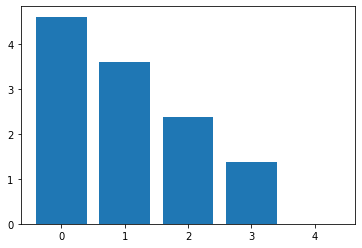

In [21]:
# Plot Eigen Values
import matplotlib.pyplot as plt

ind = np.arange(0,5)
print(ind)
plt.bar(ind, V)
plt.show()

In [23]:
print(V[:-1])

[4.61803399 3.61803399 2.38196601 1.38196601]


In [29]:
# Reconstruction
for i in ind-1:
  print('degree=', 5-(i+1))
  VV = np.diag(V[:-(i+1)])
  UU = U[:,:-(i+1)]
  print(UU)
  print(VV)
  LApp = np.dot(UU, np.dot(VV, np.transpose(UU)))
  print(LApp)

  print('MSE=', np.linalg.norm(L-LApp))

degree= 5
[]
[]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
MSE= 6.48074069840786
degree= 4
[[-6.61792833e-17  6.32455532e-01  3.02887049e-17 -6.32455532e-01]
 [-6.01500955e-01 -5.11667274e-01 -3.71748034e-01 -1.95439508e-01]
 [ 6.01500955e-01 -5.11667274e-01  3.71748034e-01 -1.95439508e-01]
 [-3.71748034e-01  1.95439508e-01  6.01500955e-01  5.11667274e-01]
 [ 3.71748034e-01  1.95439508e-01 -6.01500955e-01  5.11667274e-01]]
[[4.61803399 0.         0.         0.        ]
 [0.         3.61803399 0.         0.        ]
 [0.         0.         2.38196601 0.        ]
 [0.         0.         0.         1.38196601]]
[[ 2.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.18464852e-16
  -3.35426643e-17]
 [-1.00000000e+00  3.00000000e+00 -1.00000000e+00  6.55822617e-16
  -1.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00  3.00000000e+00 -1.00000000e+00
   9.80141977e-16]
 [-7.10557786e-17  3.34159507e-16 -1.00000000e+00  2.00000000e+00
  -1.00000000e+